In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df1 = pd.read_csv("tips (data for regression problem).csv")

In [96]:
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The dataset shows a positive relationship between total_bill and tip, with categorical variables like sex and day requiring encoding. Further exploration for outliers and missing values is needed to improve model performance.

In [94]:
df1.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


 The dataset has a mix of numerical and categorical features, with total_bill having a wide range from 3 to 50, and tip ranging from 1 to 10. Most categorical columns like sex, smoker, and day show balanced distributions.

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


The dataset contains 244 entries with 7 columns, including numerical and categorical data. There are no missing values, and the data types are correctly assigned for each column (e.g., float for total_bill and tip, object for categorical variables like sex and smoker).

In [78]:
print(df1.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
time          0
size          0
day_Sat       0
day_Sun       0
day_Thur      0
dtype: int64


The dataset has no missing values, as indicated by all columns having zero null values. The isnull().sum() function confirms that each column is complete with no NaN entries.

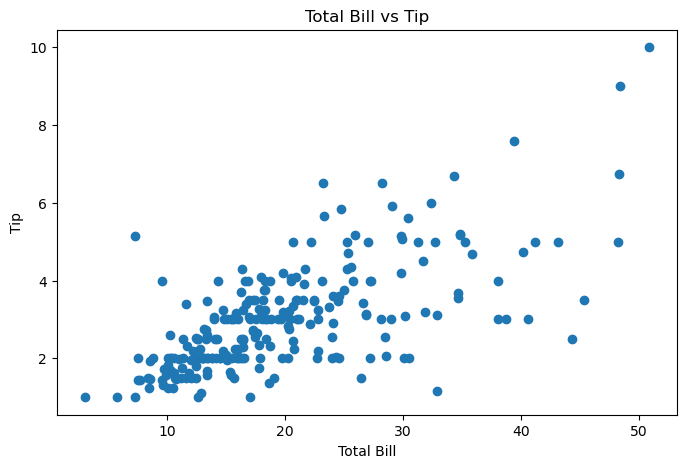

In [84]:
plt.figure(figsize=(8, 5))
plt.scatter(df['total_bill'], df['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Total Bill vs Tip')
plt.show()


This scatter plot visualizes the relationship between the total bill and tip amounts. It shows how tip amounts tend to increase with the total bill.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['sex'] = le.fit_transform(df1['sex']) 
df1['smoker'] = le.fit_transform(df1['smoker'])
df1['time'] = le.fit_transform(df1['time'])
df1 = pd.get_dummies(df1, columns=['day'], drop_first=True)  


In [104]:
df1.head()

,total_bill,tip,sex,smoker,time,size,day_Sat,day_Sun,day_Thur
0,16.99,1.01,0,0,0,2,False,True,False
1,10.34,1.66,1,0,0,3,False,True,False
2,21.01,3.50,1,0,0,3,False,True,False
3,23.68,3.31,1,0,0,2,False,True,False
4,24.59,3.61,0,0,0,4,False,True,False


In [106]:
X = df1.drop('tip', axis=1).values   
y = df1['tip'].values 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) 
print(f"Linear Regression - MAE: {mae:.3f}, R²: {r2:.3f}")

Linear Regression - MAE: 0.667, R²: 0.437


### Ridge Regularization


In [113]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge_model = Ridge(alpha=1.0) 
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {mae_ridge:.3f}, R²: {r2_ridge:.3f}")


Ridge Regression - MAE: 0.667, R²: 0.439


### Lasso Regularization


In [119]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MAE: {mae_lasso:.3f}, R²: {r2_lasso:.3f}")


Lasso Regression - MAE: 0.637, R²: 0.527


### Decision Tree Regression

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

tree_model = DecisionTreeRegressor(random_state=42) 
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Regression - MAE: {mae_tree:.3f}, R²: {r2_tree:.3f}")


Decision Tree Regression - MAE: 0.830, R²: -0.004


### Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_model = RandomForestRegressor(random_state=42) 
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression - MAE: {mae_rf:.3f}, R²: {r2_rf:.3f}")


Random Forest Regression - MAE: 0.758, R²: 0.258


### Support Vector Regression (SVR)

In [130]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - MAE: {mae_svr:.3f}, R²: {r2_svr:.3f}")


Support Vector Regression - MAE: 0.568, R²: 0.574


### KNN

In [137]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression - MAE: {mae_knn:.3f}, R²: {r2_knn:.3f}")


KNN Regression - MAE: 0.729, R²: 0.291


### Customer Service Strategies:
Personalization: Tailor experiences using customer data.
Proactive Support: Notify customers about issues or updates.
Omni-channel Support: Offer service across multiple platforms.
Customer Feedback: Regularly gather and act on feedback.
Staff Training: Equip employees with skills for better service.
### Revenue Management:
Dynamic Pricing: Adjust prices based on demand and competition.
Upselling: Suggest upgrades and complementary products.
Loyalty Programs: Encourage repeat business with rewards.
Forecasting: Use analytics to predict demand and adjust strategies.
Segmentation: Tailor offers based on customer segments

### Scatter Plot

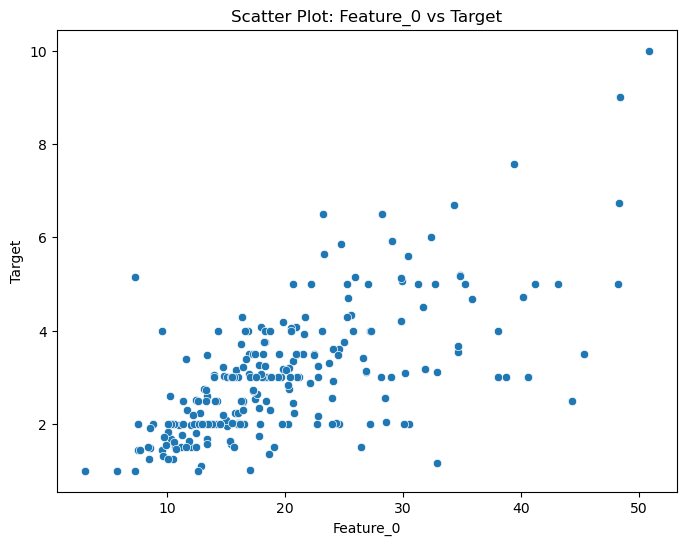

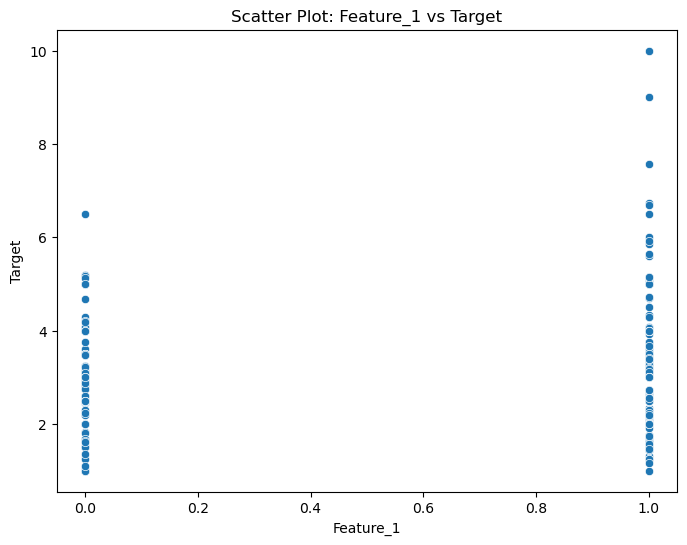

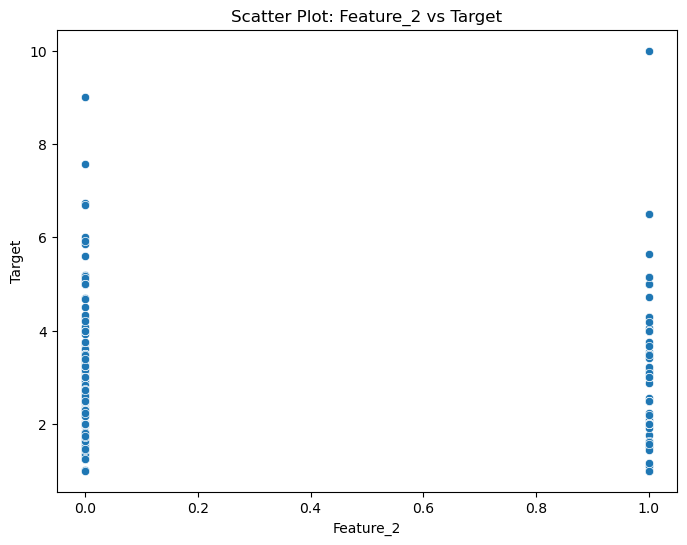

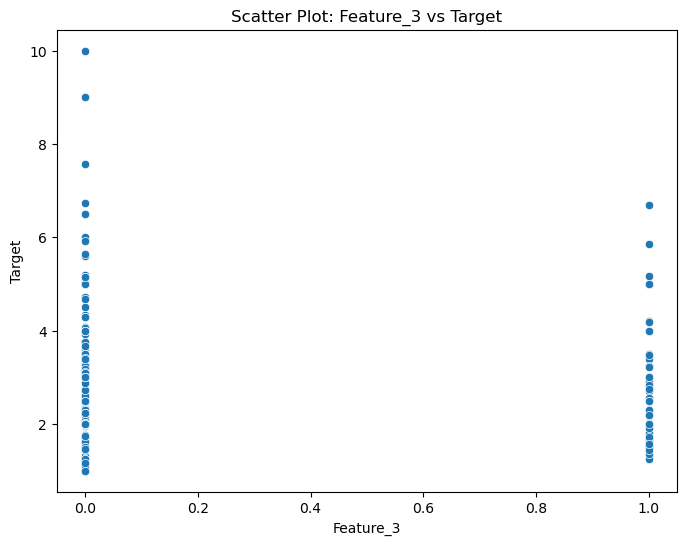

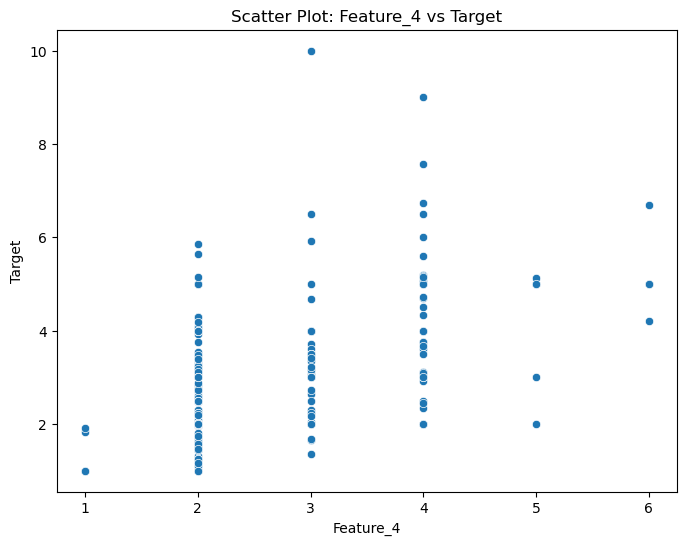

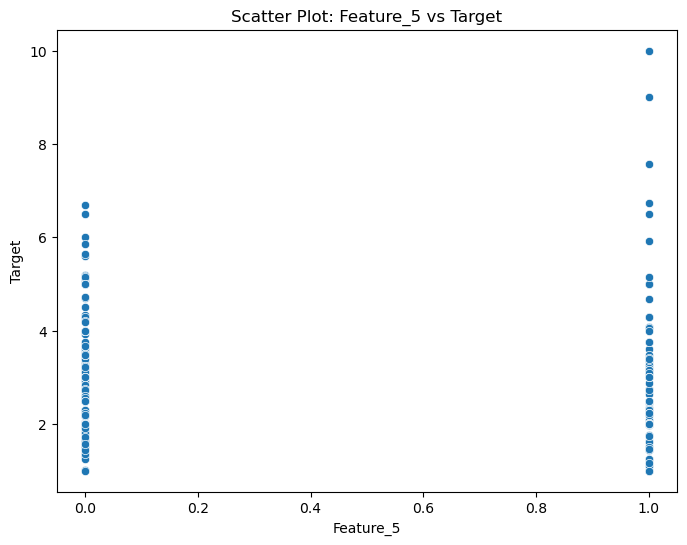

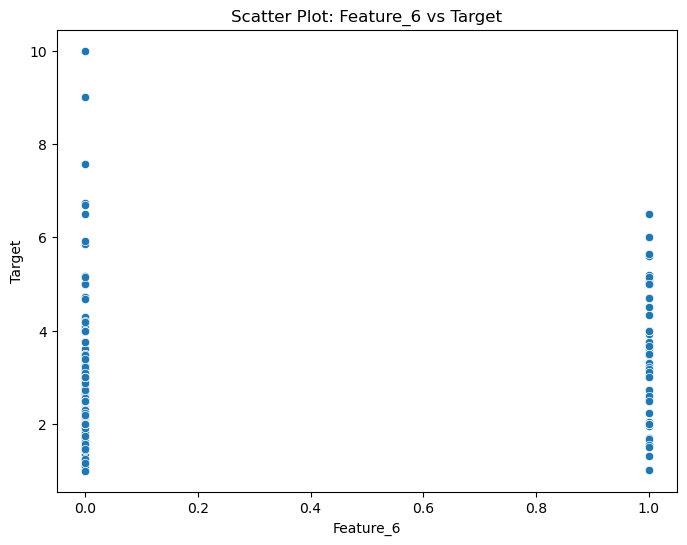

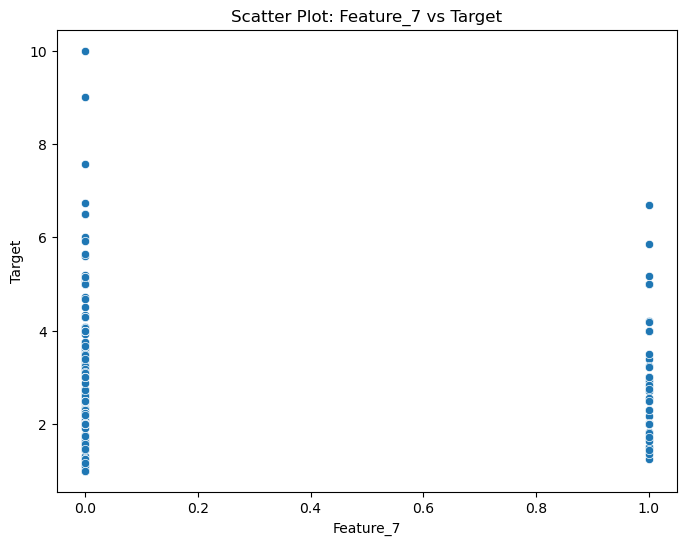

In [148]:
X_df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
for feature in X_df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_df[feature], y=y)
    plt.title(f'Scatter Plot: {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()

### Pair Plot

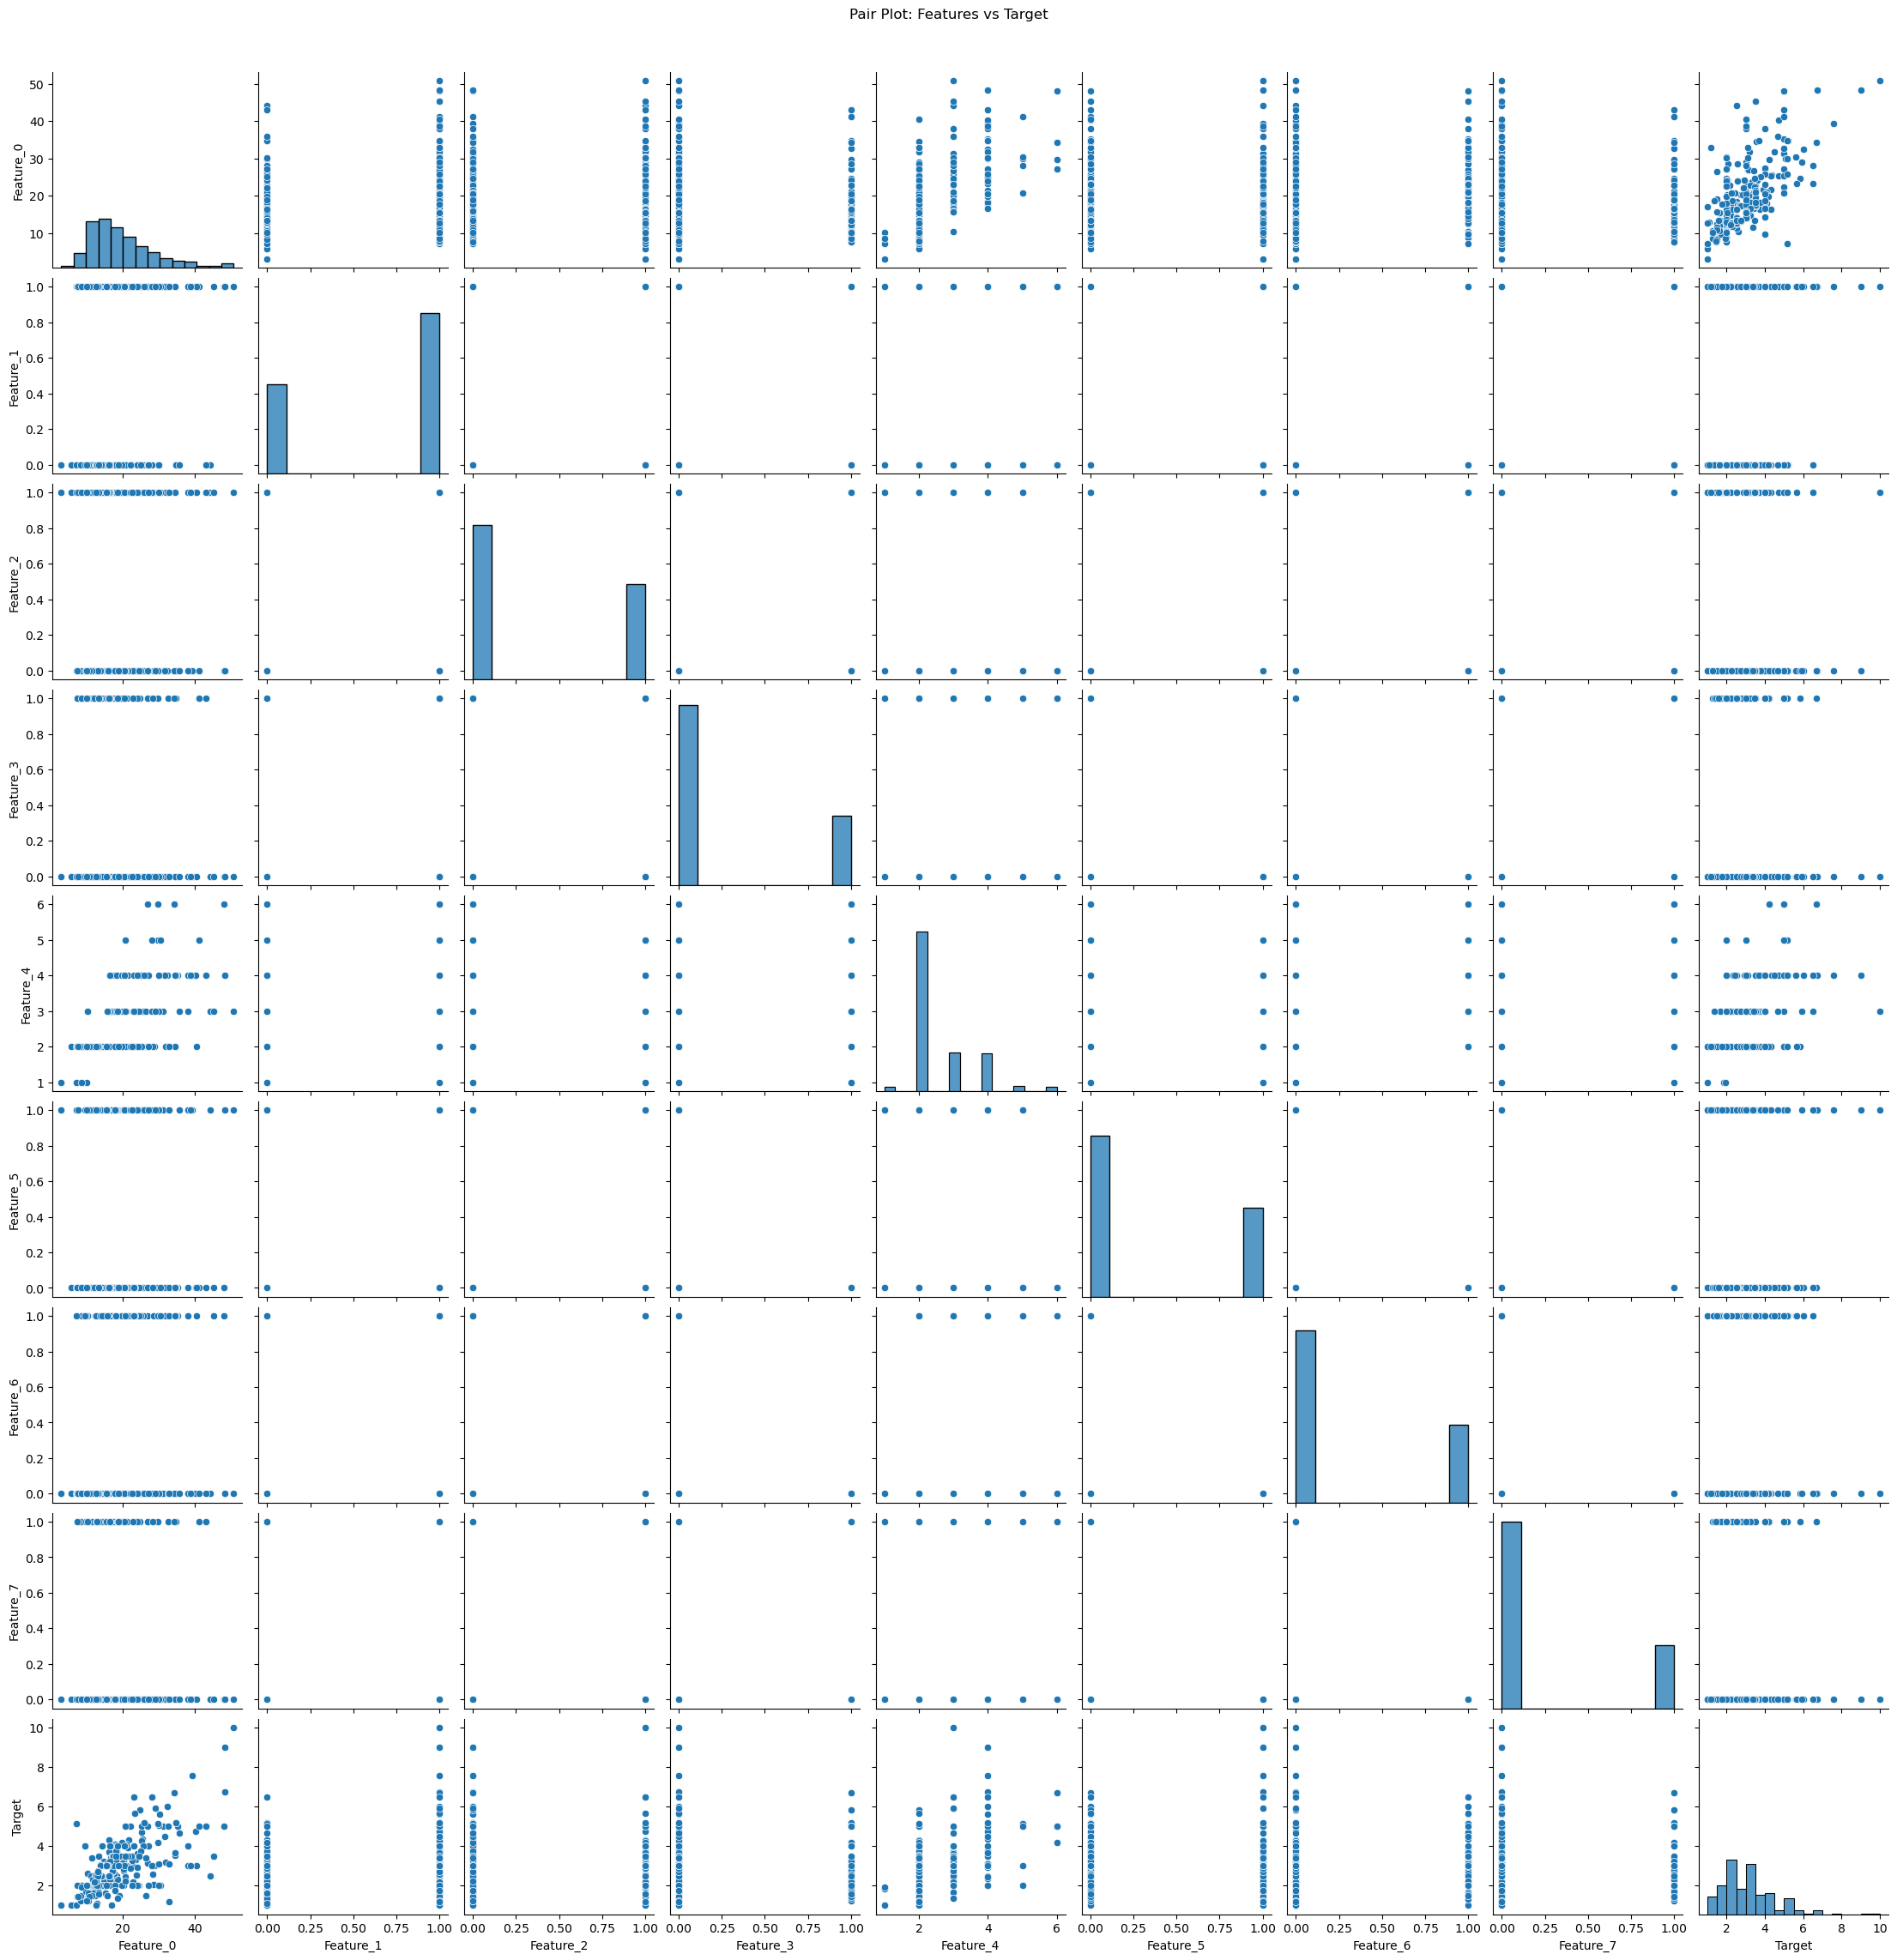

In [153]:
df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df['Target'] = y
sns.pairplot(df)
plt.suptitle('Pair Plot: Features vs Target', y=1.02)
plt.show()

### Correlation matrix (Heatmap)

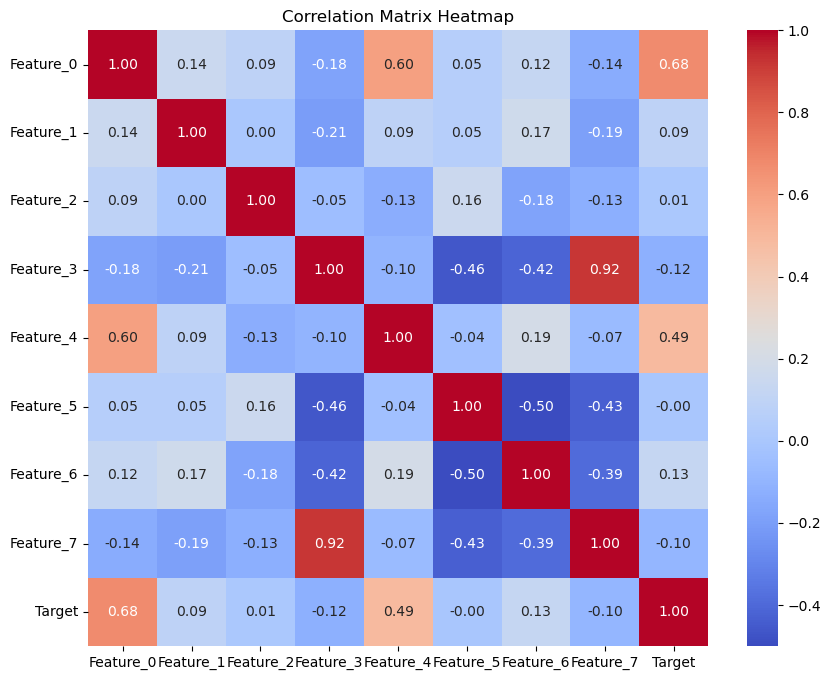

In [156]:
df1 = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
df1['Target'] = y

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

###  Residual Test

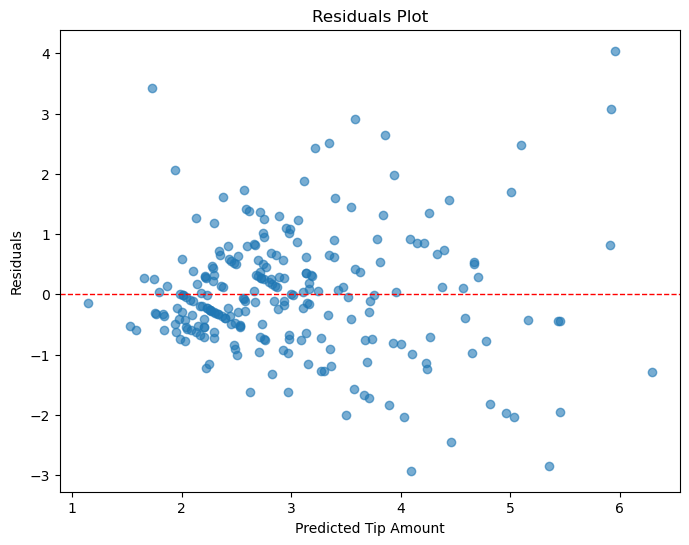

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

X = df1[['total_bill', 'size']]
y = df1['tip']
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred = linear_model.predict(X)
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Tip Amount")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

### Statistical Tests for Linearity (Rainbow Test)

In [46]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow

##Fit the OLS model
model = ols('tip ~ total_bill + size + sex + smoker + time + day_Sat + day_Sun + day_Thur', data=df1).fit()

stat, p_value = linear_rainbow(model)

print(f"Rainbow Test Statistic: {stat:.3f}")
print(f"Rainbow Test p-value: {p_value:.3f}")

## Interpret the p-value from the Rainbow test

if p_value < 0.05:
    print("The p-value is low, suggesting that a linear model may not be a good fit.")
else:
    print("The p-value is high, suggesting that a linear model may be appropriate.")

Rainbow Test Statistic: 1.197
Rainbow Test p-value: 0.166
The p-value is high, suggesting that a linear model may be appropriate.


### Line Plot (for time-series data)

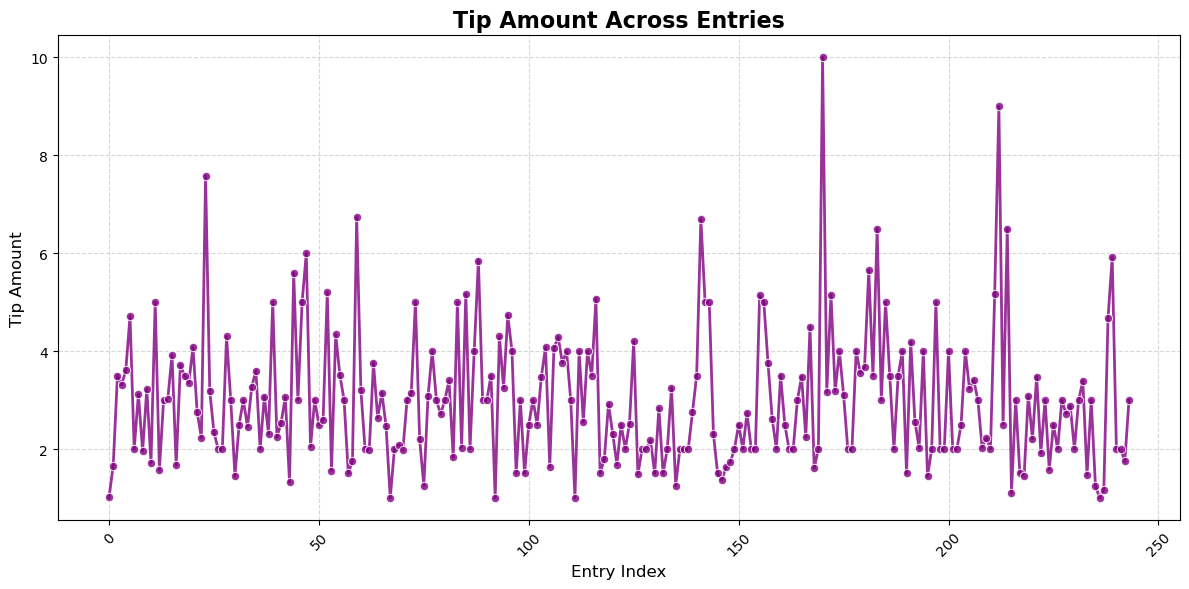

In [66]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=df1, x=df1.index, y='tip', marker='o', color='purple', lw=2, alpha=0.8)

plt.title("Tip Amount Across Entries", fontsize=16, fontweight='bold')
plt.xlabel("Entry Index", fontsize=12)
plt.ylabel("Tip Amount", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Based on the results:

Support Vector Regression (SVR) has the best performance, with the lowest MAE (0.568) and the highest R² (0.574), suggesting it has the best ability to predict the target variable with minimal error.
Lasso Regression also performs well, with a lower MAE (0.637) and R² of 0.527, making it another solid choice.
If you're looking for a model that balances prediction accuracy and model complexity, SVR is the best option. However, if interpretability is more important and you don't need a complex model, Lasso Regression could also be a good choice.